### 클래스 불균형 문제 해결을 위한 언더샘플링과 오버샘플링
#### 일반적인 기계학습 분류 모델은, 적은 비중의 클래스 든 큰 비중의 클래스 든 중요도에 차별을 두지 않고 전체적으로 분류를 잘하도록 학습된다.
#### 오버샘플링을 적용할 때에는 먼저 학습셋과 테스트 셋을 분리한 다음에 적용을 해야 한다. 그렇지 않으면 학습 셋과 테스트 셋에 동일한 데이터가 들어가서 과적합을 유발하기 때문이다.

In [1]:
# 필요한 패키지 설치
!pip install imbalanced-learn==0.7.0
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 300

     -------------------------------------- 167.1/167.1 kB 1.4 MB/s eta 0:00:00


In [2]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/Social_Network_Ads.csv")

# 데이터 샘플 확인
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

# 총 400개의 관측치가 있고 Gender 칼럼은 문자형 변수이다.
# 언더샘플링과 오버샘플링을 하려면 문자형 변수를 가변수로 바꿔줘야한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


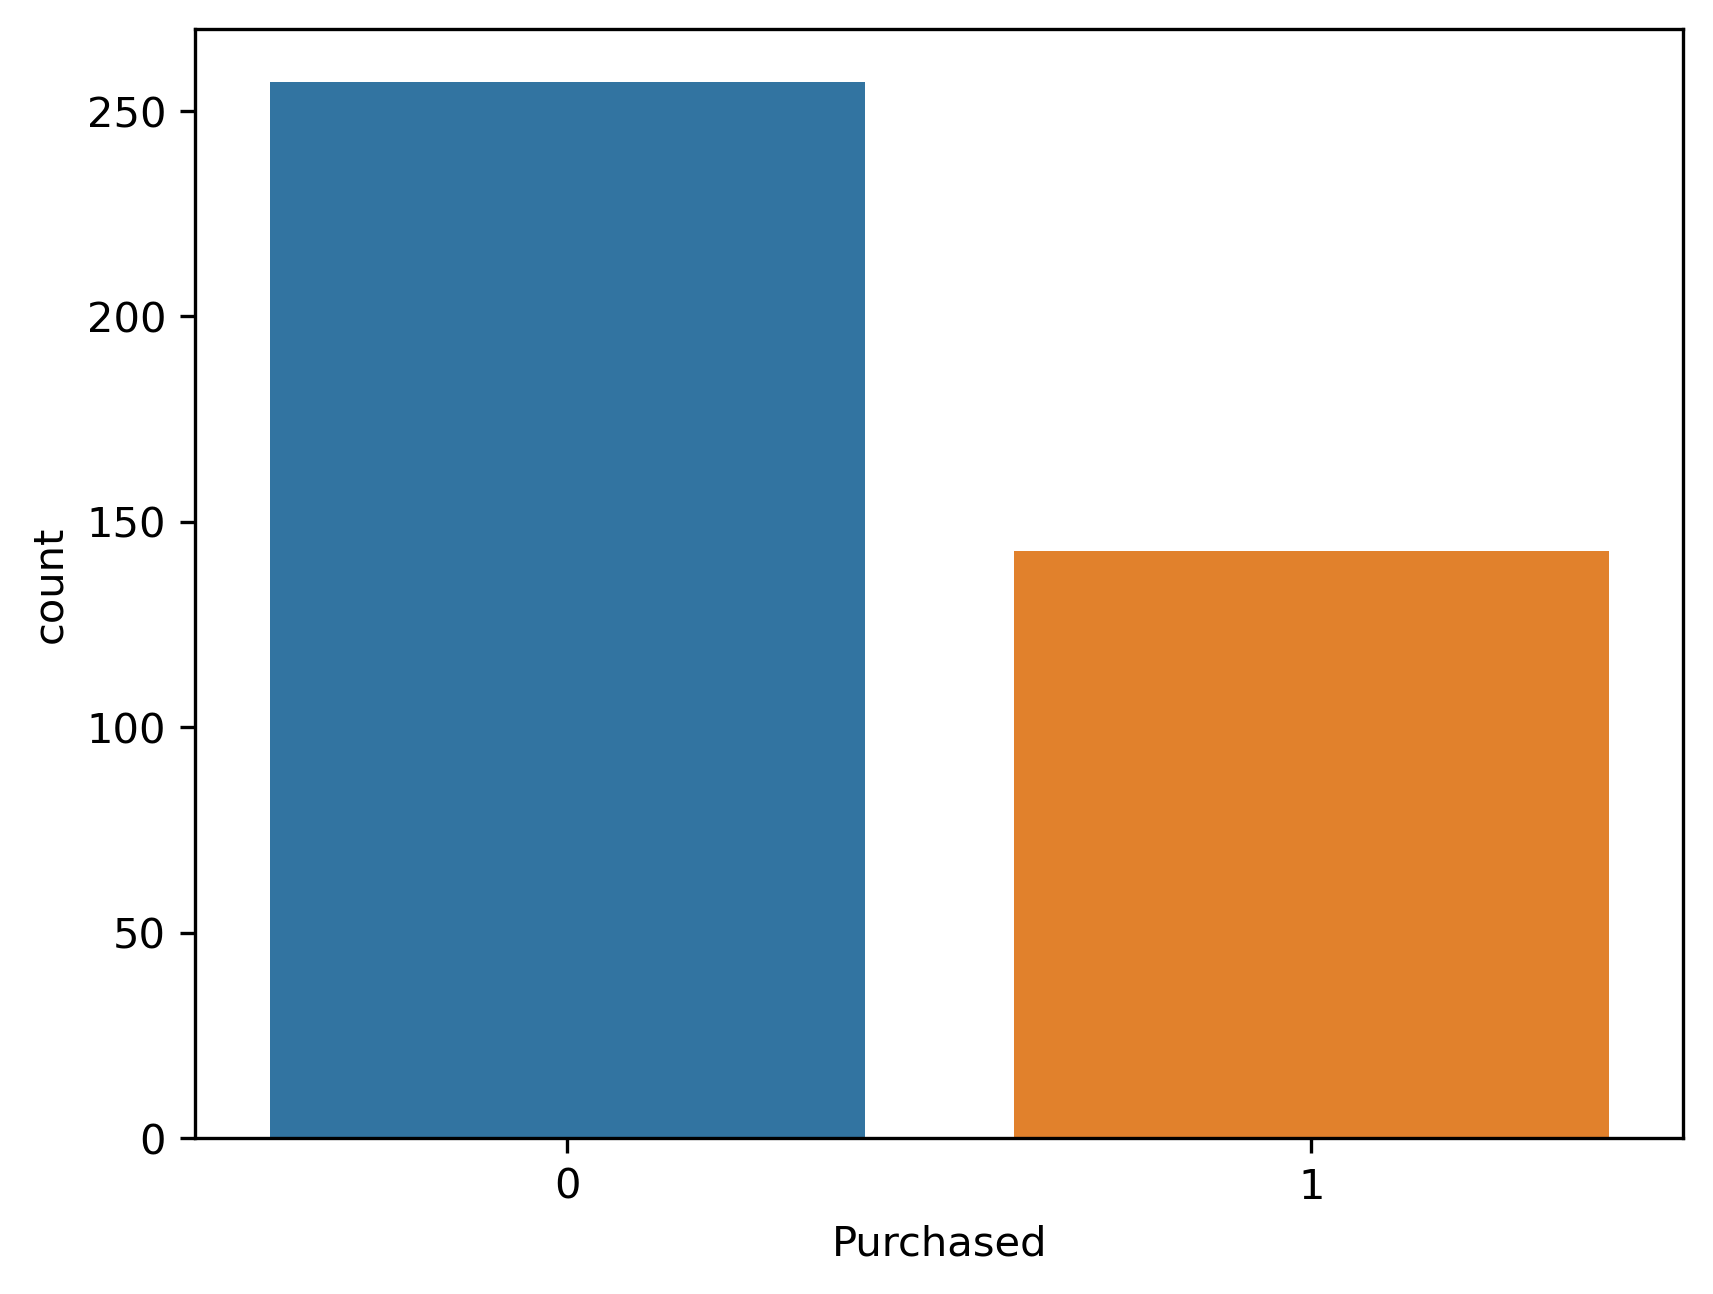

In [4]:
# Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=df)

plt.show()

#클래스 비율을 조정해야 하는 Purchased 칼럼의 기존 분포를 시각화했다.
#총 400개의 관측치 중 0값은 약 250개 1값은 약 150개 가량이다.
#1값이 전체의 약 35%정도로 약간의 클래스 불균형이 존재한다.

In [5]:
# Gender 컬럼 가변수 처리

df_d = pd.get_dummies(df['Gender'])

df2 = pd.merge(df.drop(['Gender'], axis=1), 
               df_d['Male'],left_index=True, right_index=True,how = 'inner')

df2.head()

#언더샘플링과 오버샘플링을 적용하기 전에 문자형 변수인 Gender 칼럼을 가변수로 처리해 준다.
#모델에서는 남성과 여성 칼럼을 모두 넣을 필요가 없으므로 남성 여부 칼럼만 넣어준다.

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [6]:
# 데이터셋 학습셋, 테스트셋 분리

X = df2.drop(['Purchased'], axis=1)
y = df2[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=10)

X_train.head()

#언더샘플링이나 오버샘플링을 하는 이유는 머신러닝 모델의 성능을 향상시키기 위한 것이기 때문에 모델에 적합하도록 데이터셋을 전처리해야한다.
#테스트셋은 실제 데이터에 대한 모델 성능을 평가하는 용도로 사용하는 것이기 때문에 학습셋에만 언더샘플링이나 오버샘플링을 적용한다.

,User ID,Age,EstimatedSalary,Male
57,15807481,28,79000,1
87,15631912,28,85000,0
357,15671387,41,72000,0
355,15606472,60,34000,1
238,15617877,46,82000,0


In [7]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(X_train,y_train)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['Purchased']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['Purchased']).value_counts())
#RandomUnderSampler 함수를 사용하여 학습셋에 언더샘플리을 적용한다.
#언더샘플링은 비율이 높은 클래스의 관측치를 적은 비율의 클래스만큼 줄이는 것이므로, 기존 300개 관측치가 112:112의 224개로 줄었다.

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (300, 4) (300, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (224, 4) (224, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 0    188
1    112
Name: Purchased, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 0    112
1    112
Name: Purchased, dtype: int64


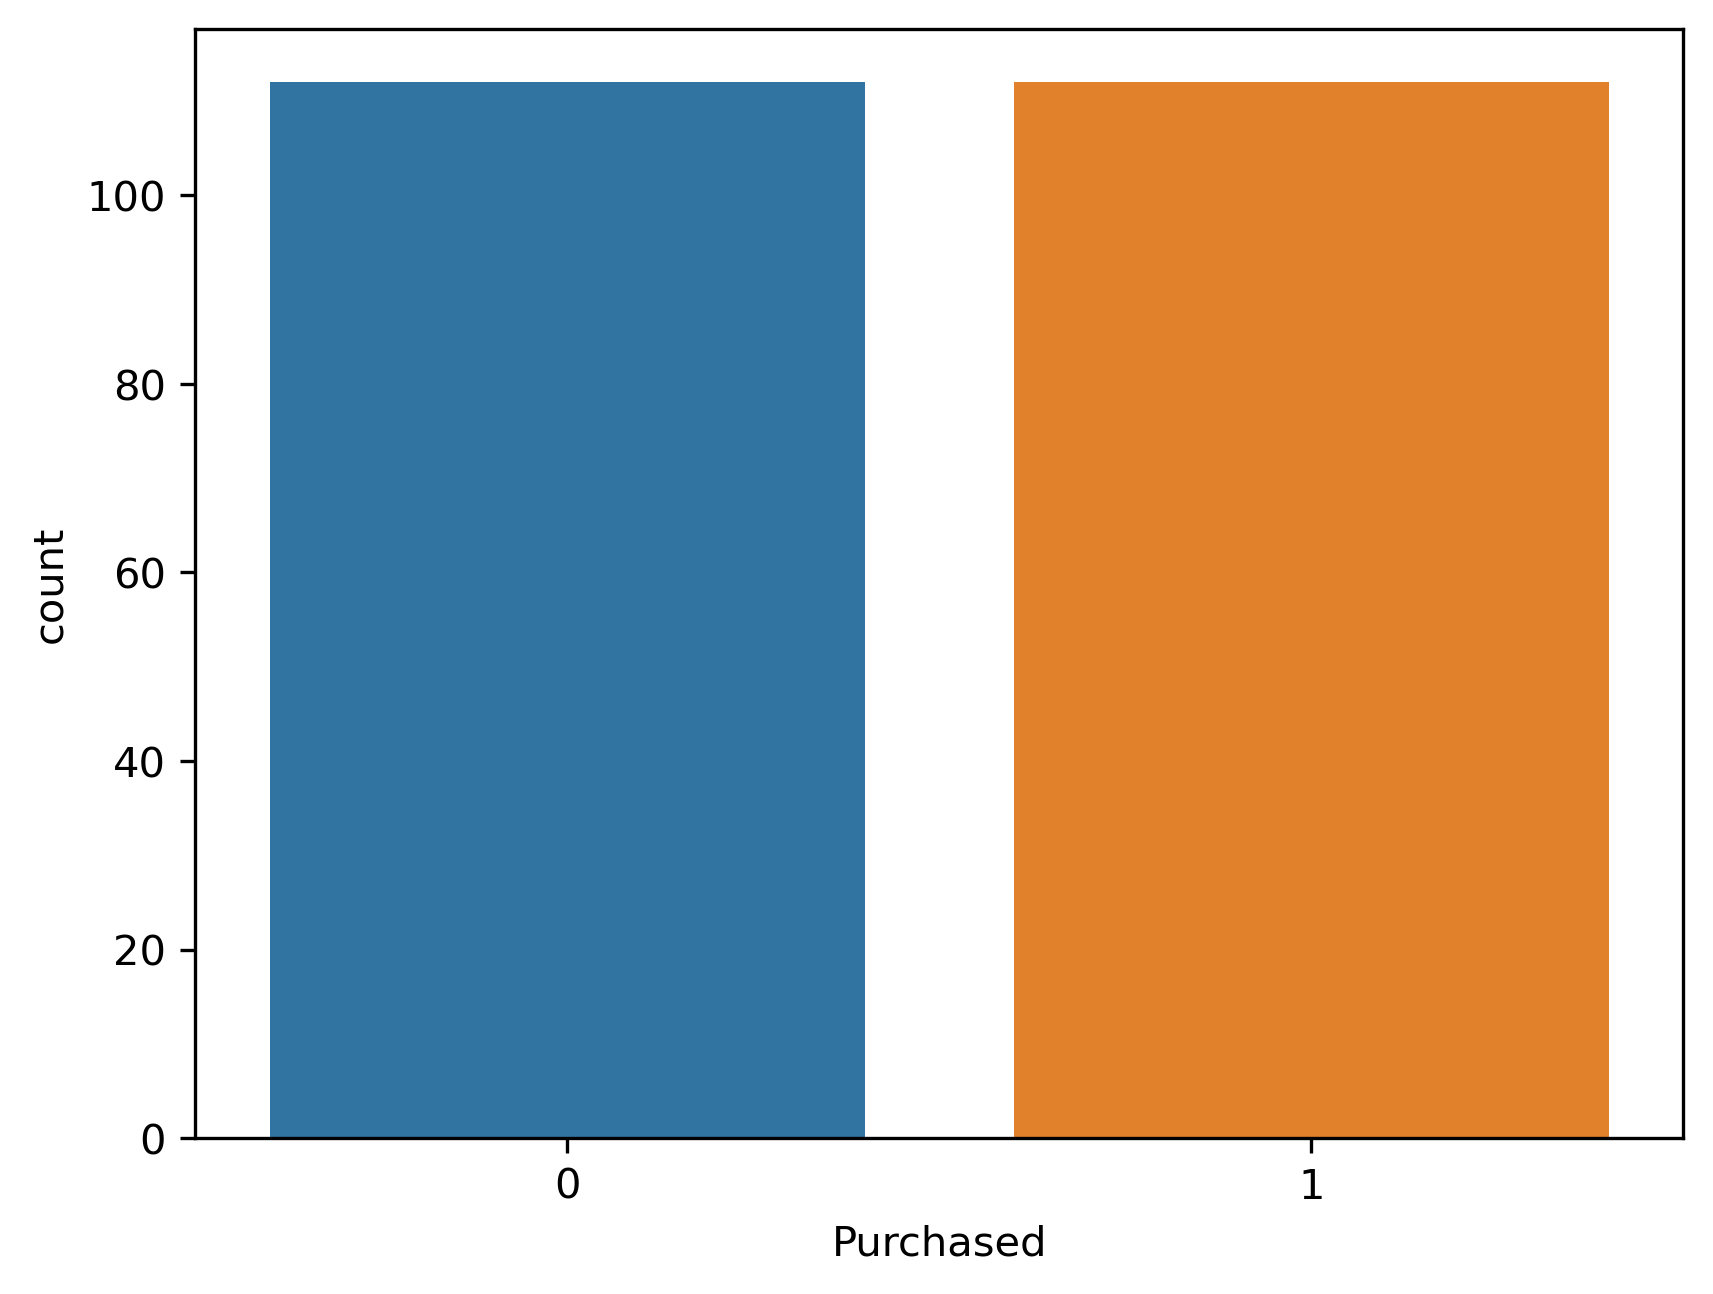

In [8]:
# 언더샘플링 적용 후 Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=y_train_under)

plt.show()

#언더샘플링 적용 후 분포가 동일함을 확인 가능

In [9]:
# 오버샘플링 적용

smote = SMOTE(k_neighbors = 2, random_state=0)
oversample = SMOTE()

X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 변수/레이블 데이터 세트: '
      , X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['Purchased']).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_over['Purchased']).value_counts())

#SMOTE 함수를 사용해 학습셋에 오버샘플링을 적용한다. 오버샘플링은 비율이 낮은 클래스이 관측치를 높은 비율의 클래스만큼 증가시키는 것
#기존 300개 관측치가 188:188의 376개의 관측치로 증가

SMOTE 적용 전 학습용 변수/레이블 데이터 세트:  (300, 4) (300, 1)
SMOTE 적용 후 학습용 변수/레이블 데이터 세트:  (376, 4) (376, 1)
SMOTE 적용 전 레이블 값 분포: 
 0    188
1    112
Name: Purchased, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 0    188
1    188
Name: Purchased, dtype: int64


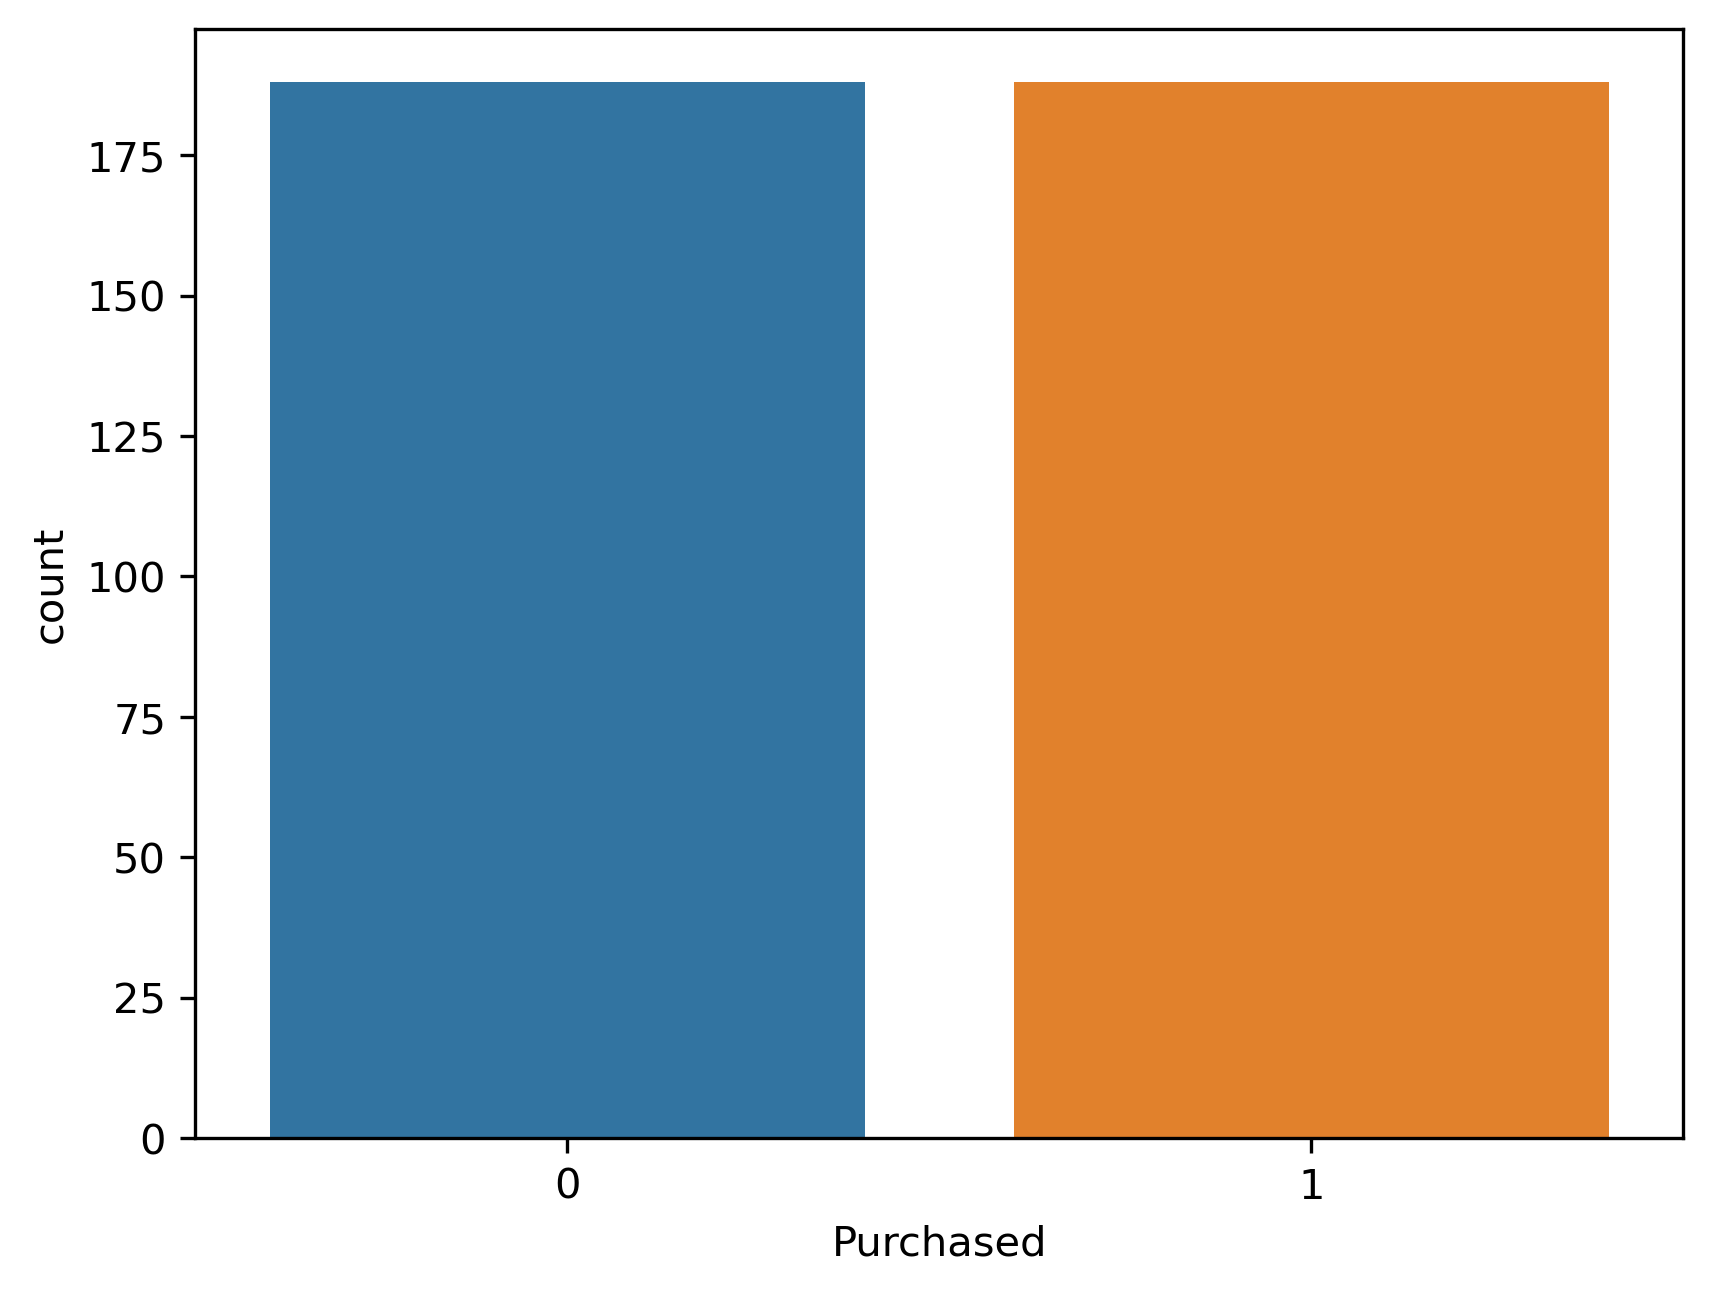

In [10]:
# 오버샘플링 적용 후 Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=y_train_over)

plt.show()

#마찬가지로 분포가 동일한 것을 확인 가능

In [11]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 57 to 265
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Purchased  300 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [12]:
X_train_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          224 non-null    int64
 1   Age              224 non-null    int64
 2   EstimatedSalary  224 non-null    int64
 3   Male             224 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 5.6 KB
